# CDA 실습

In [1]:
import pandas as pd

df = pd.read_csv('../../data_resources/cda_sample_data.csv')

In [2]:
df.head()

,키(cm),체온(°C),운동시간(분),게임시간(분),유튜브시청시간(분),성별,흡연여부,집단,시험점수,집단_C
0,173.48,36.58,5.0,12.0,1.0,여,흡연,B,74.0,B
1,169.03,36.60,3.0,26.0,4.0,여,비흡연,A,75.0,A
2,174.53,36.30,21.0,18.0,1.0,남,비흡연,B,46.0,B
3,180.66,36.57,25.0,24.0,4.0,여,비흡연,B,80.0,B
4,168.36,36.59,70.0,4.0,2.0,여,비흡연,A,68.0,A


# 1. 정규성 검정

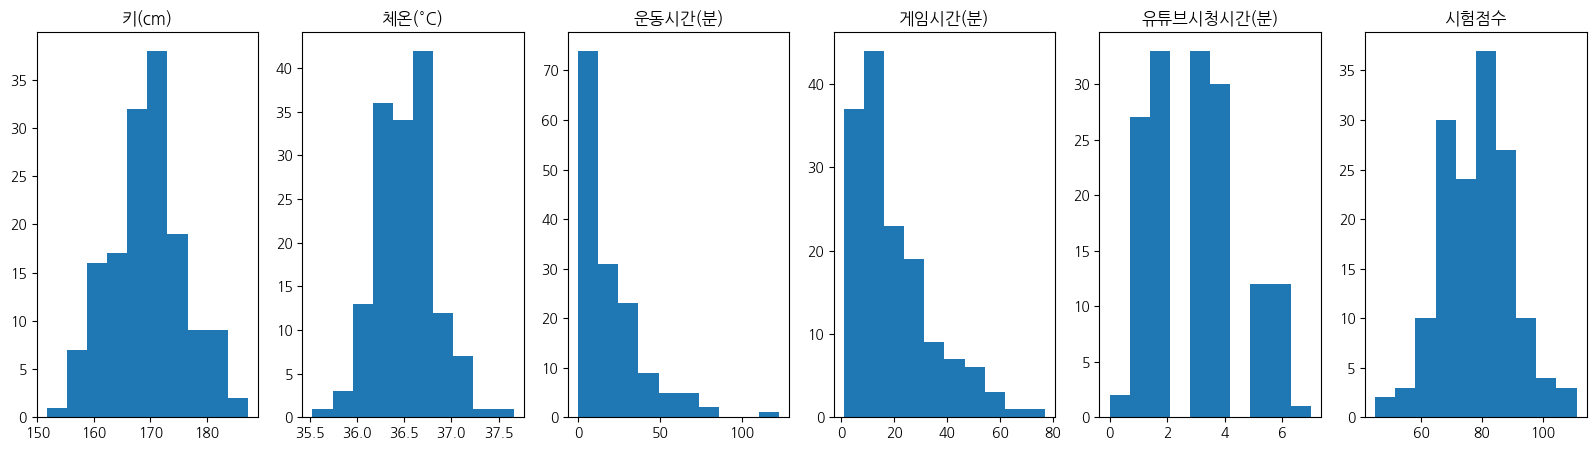

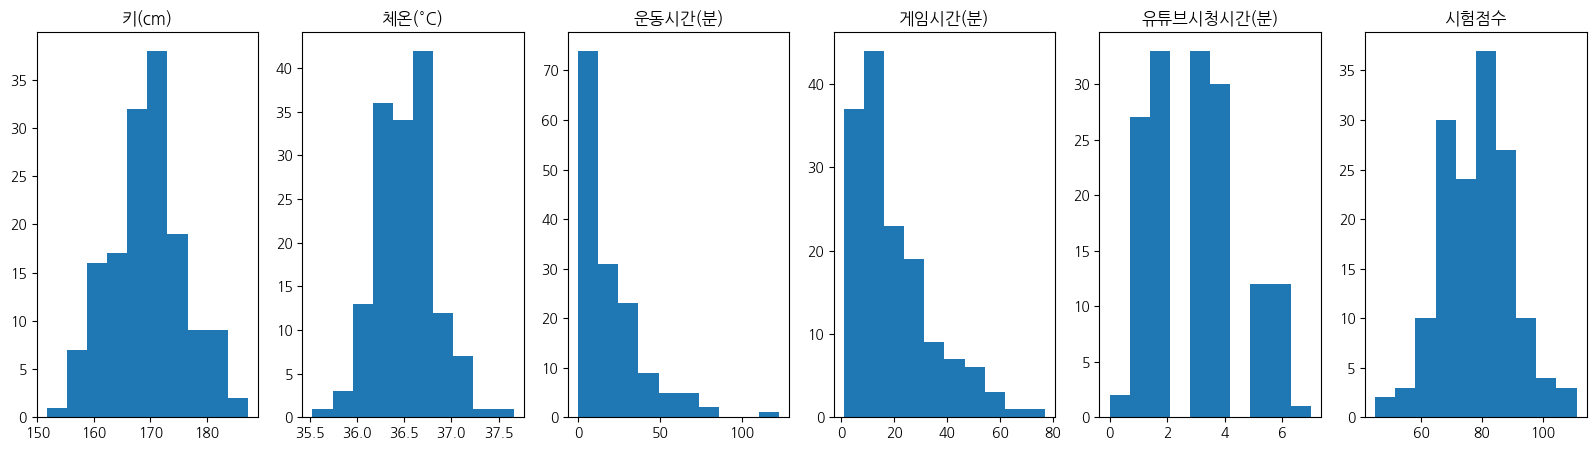

In [ ]:
# 연속형 변수를 찾은 다음에 히스토그램 그려보기

import matplotlib.pyplot as plt
import koreanize_matplotlib

variables = ["키(cm)", "체온(°C)", "운동시간(분)", "게임시간(분)", "유튜브시청시간(분)", '시험점수']

fig, ax = plt.subplots(1, len(variables), figsize=(20, 5))

for i, var in enumerate(variables) :
    ax[i].hist(df[var])
    ax[i].set_title(var)


In [11]:
from scipy.stats import shapiro

for i, var in enumerate(variables) :
    result = shapiro(df[var])
    print(result)
    print(f"{var} 정규성 검정 결과 p-value: {result[1]:.4f}")

ShapiroResult(statistic=np.float64(0.9958013601422515), pvalue=np.float64(0.9478115310795381))
키(cm) 정규성 검정 결과 p-value: 0.9478
ShapiroResult(statistic=np.float64(0.9852952070629711), pvalue=np.float64(0.1116953655236208))
체온(°C) 정규성 검정 결과 p-value: 0.1117
ShapiroResult(statistic=np.float64(0.8214531107009067), pvalue=np.float64(3.042027497957974e-12))
운동시간(분) 정규성 검정 결과 p-value: 0.0000
ShapiroResult(statistic=np.float64(0.881865096741161), pvalue=np.float64(1.4136883662166838e-09))
게임시간(분) 정규성 검정 결과 p-value: 0.0000
ShapiroResult(statistic=np.float64(0.9366994624710727), pvalue=np.float64(2.9937861103593303e-06))
유튜브시청시간(분) 정규성 검정 결과 p-value: 0.0000
ShapiroResult(statistic=np.float64(0.9948505702914499), pvalue=np.float64(0.8772260778466701))
시험점수 정규성 검정 결과 p-value: 0.8772


# 2. 평균 검정

## 1) 독립표본 평균 검정

In [ ]:
## 독립 표본이란? 두 집단이 독립니다. ex. 언리얼반/AI반, 광고A/광고B
# 조건 1 : 두 집단은 각각 정규분포를 따르는 연속형 데이터이다.
# 조건 2 : 두 집단은 분산이 같은지 다른지 판단해야한다. # 등분산인지 아닌지에 따라 통계량 구하는 방식이 달라진다.
# 귀무가설 (H0): 두 집단의 평균은 같다.
# 대립가설 (H1): 두 집단의 평균은 같지 않다(크다/작다)


## 2) 대응 표본 평균 검정